In [2]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import os
import sys
import pathlib
import itertools as it
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio

mod_path = os.path.abspath(os.path.join('..', '..', '..'))
if mod_path not in sys.path:
    sys.path.insert(0, mod_path)

from ex7.python.libs import *

In [4]:
mpl.rcParams['figure.dpi'] = 150

# Principal Component Analysis

In [5]:
data = sio.loadmat('../../data/ex7data1.mat')
X = data['X']

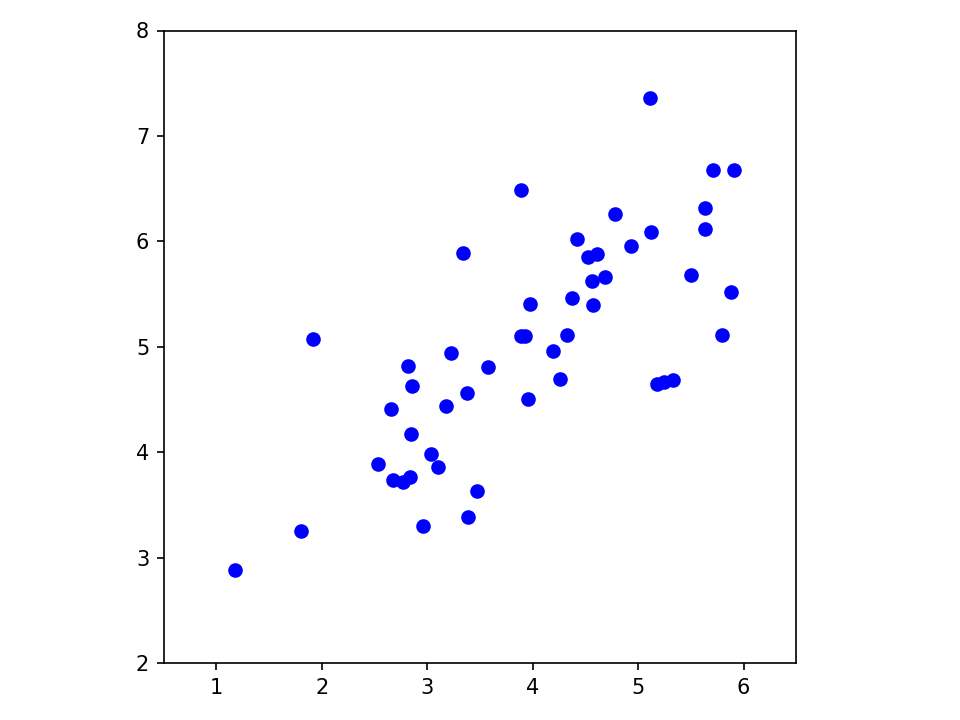

In [6]:
fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], 'bo')
ax.set_xlim([0.5, 6.5])
ax.set_ylim([2, 8])
ax.set_aspect('equal')
fig.tight_layout()

# PCA

In [7]:
X_norm, mu, sigma = feature_normalize(X)

In [8]:
U, S = pca(X_norm)

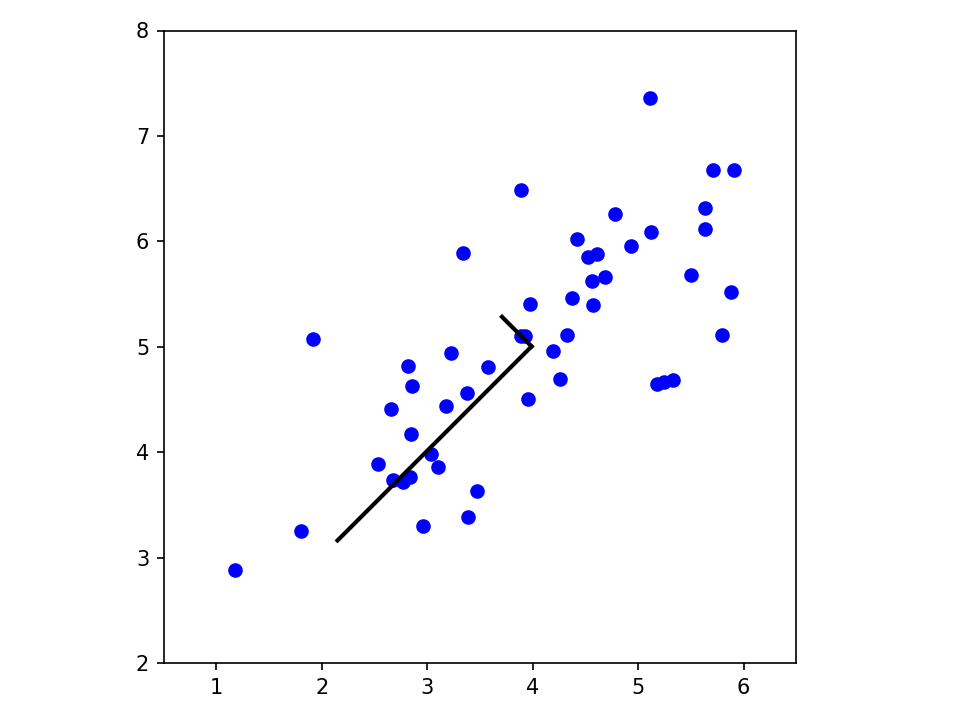

In [9]:
fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], 'bo')
ax.set_xlim([0.5, 6.5])
ax.set_ylim([2, 8])
ax.set_aspect('equal')

p1 = list(zip(mu, mu + 1.5 * S[0] * U[:, 0].T))
p2 = list(zip(mu, mu + 1.5 * S[1] * U[:, 1].T))

for pt in [p1, p2]:
    ax.plot(pt[0], pt[1], '-k', linewidth=2)

fig.tight_layout()

In [10]:
print(f'''Top eigenvector:
U[:, 0] = {U[0,0]:f} {U[1,0]:f}
(you should expect to see -0.707107 -0.707107)
''')

Top eigenvector:
U[:, 0] = -0.707107 -0.707107
(you should expect to see -0.707107 -0.707107)



## Dimension reduction

In [11]:
K = 1
Z = project_data(X_norm, U, K)
print(f'''Projection of the first example: {Z[0]}

(this value should be about 1.481274)
''')

Projection of the first example: [1.49631261]

(this value should be about 1.481274)



In [12]:
X_rec = recover_data(Z, U, K)
print(f'''Approximation of the first example: {X_rec[0, 0]:f}, {X_rec[0, 1]:f}

(this value should be about  -1.047419 -1.047419)
''')

Approximation of the first example: -1.058053, -1.058053

(this value should be about  -1.047419 -1.047419)



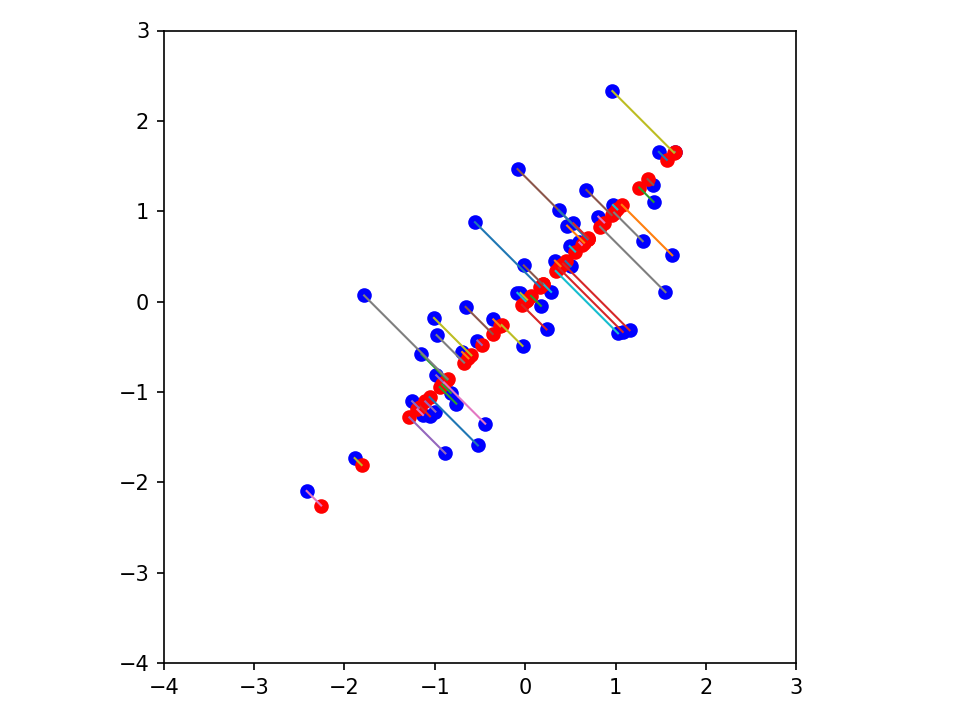

In [13]:
fig, ax = plt.subplots()
ax.plot(X_norm[:, 0], X_norm[:, 1], 'bo')
ax.set_xlim([-4, 3])
ax.set_ylim([-4, 3])
ax.set_aspect('equal')

ax.plot(X_rec[:, 0], X_rec[:, 1], 'ro')
for i in range(X_norm.shape[0]):
    draw_line(ax, X_norm[i, :], X_rec[i, :], '--k', linewidth=1)

fig.tight_layout()

In [23]:
loss = pca_loss(X_norm, Z, U, K)
loss_quick = pca_loss_quick(S, K)
print(f'''
for K = {K},
{(1.0 - loss) * 100:f} of variance is retained by naive solution.
{(1.0 - loss_quick) * 100:f} of variance is retained by binary search solution.
''')


for K = 1,
86.776519 of variance is retained by naive solution.
86.776519 of variance is retained by binary search solution.



In [24]:
print(f'Minimum K={pca_k_in_maxloss(S)} that satisfy loss <= 0.01')

Minimum K=2 that satisfy loss <= 0.01


## Loading and visualizing face data

In [25]:
data = sio.loadmat('../../data/ex7faces.mat')
X = data['X']

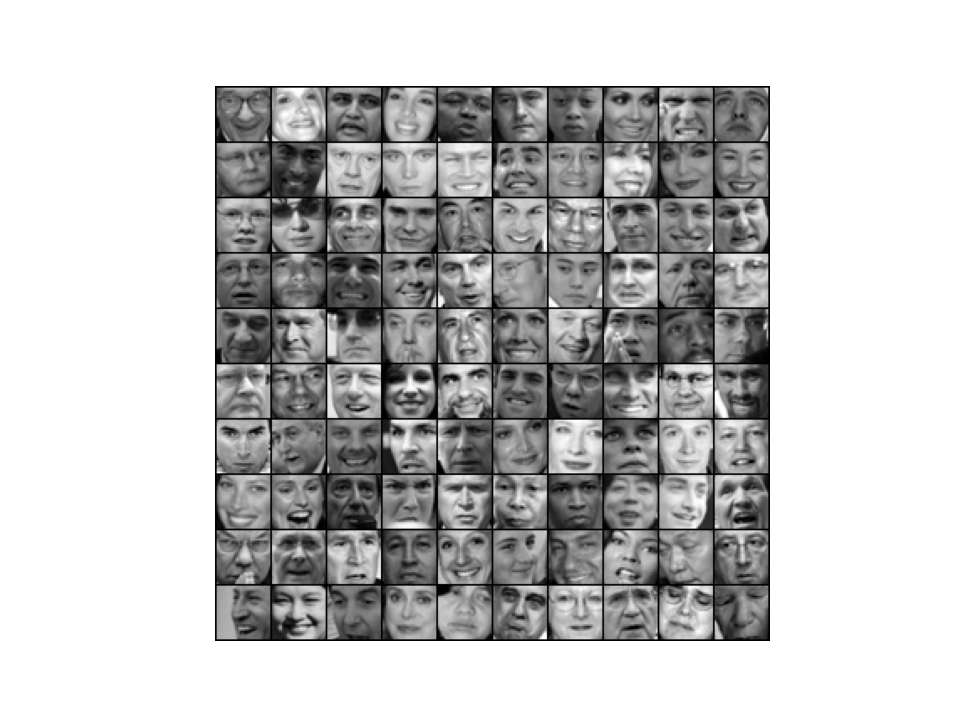

In [26]:
ax = display_data(X[:100, :]);

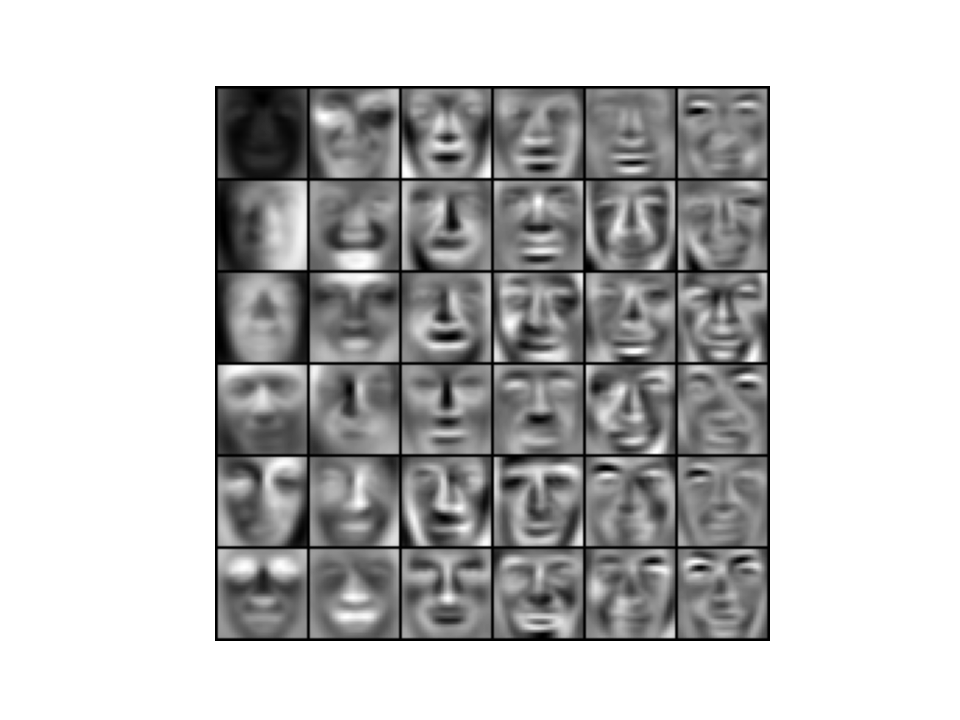

In [27]:
[X_norm, mu, sigma] = feature_normalize(X)
[U, S] = pca(X_norm)
ax = display_data(U[:, :36].T);

In [35]:
K = pca_k_in_maxloss(S, 0.01)
Z = project_data(X_norm, U, K)
print(f'Tthe projected data Z has a size of: {Z.shape}')

Tthe projected data Z has a size of: (5000, 335)


In [36]:
X_rec = recover_data(Z, U, K)

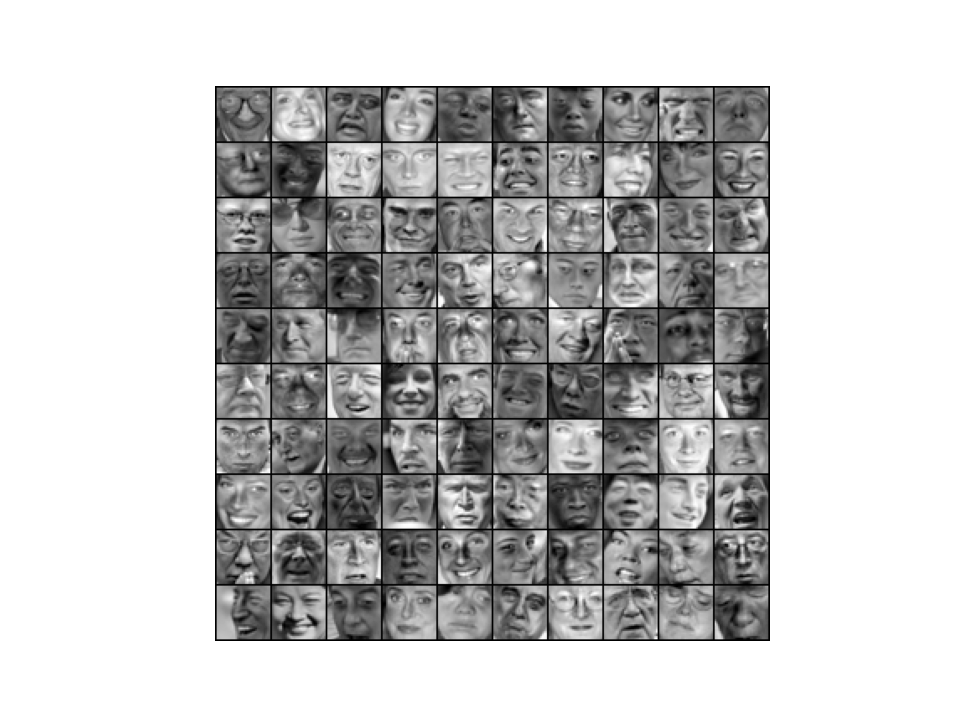

In [30]:
ax = display_data(X_norm[:100, :]);

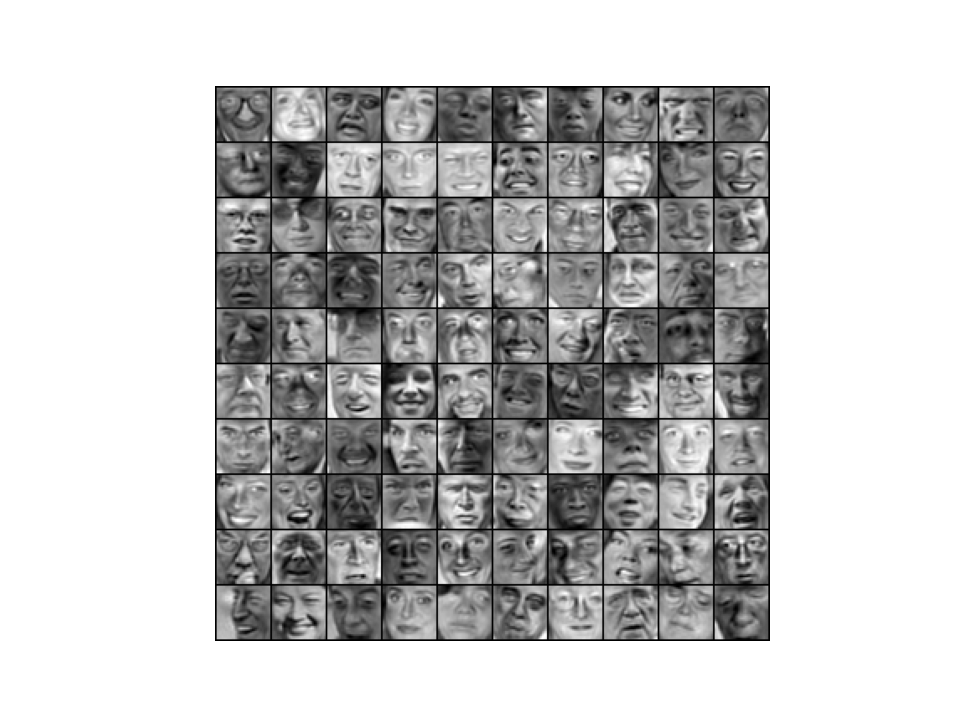

In [37]:
ax = display_data(X_rec[:100, :]);

In [38]:
loss = pca_loss_quick(S, K)
print(f'for K={K}, {((1.0 - loss) * 100):f} % of variance is retained');

for K=335, 99.004222 % of variance is retained


# Optional, PCA for visualization

In [39]:
A = mpl.image.imread('../../data/bird_small.png')
img_size = A.shape

In [40]:
X = A.reshape(img_size[0] * img_size[1], 3)

In [41]:
K = 16
max_iters = 10

In [42]:
initial_centroids = kmean_init_centroids(X, K)
centroid, idx = run_kmeans(X, initial_centroids, max_iters)

In [43]:
sel = np.random.choice(range(X.shape[0]), 1000)

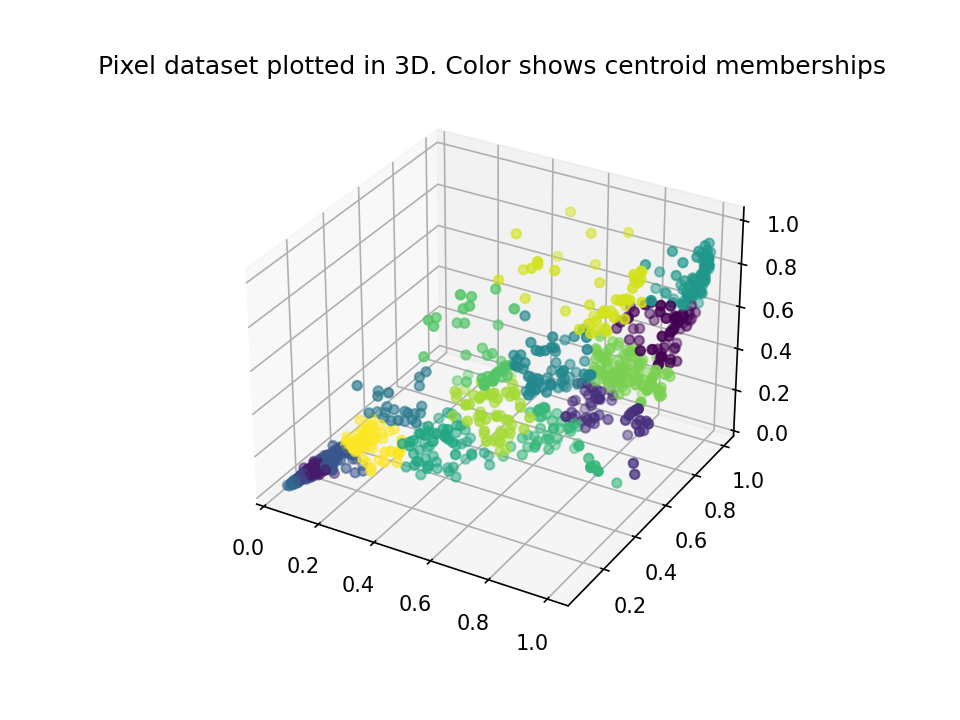

In [44]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[sel, 0], X[sel, 1], X[sel, 2], c=idx[sel])
ax.set_title('Pixel dataset plotted in 3D. Color shows centroid memberships');

In [45]:
[X_norm, mu, sigma] = feature_normalize(X)
[U, S] = pca(X_norm)
Z = project_data(X_norm, U, 2)

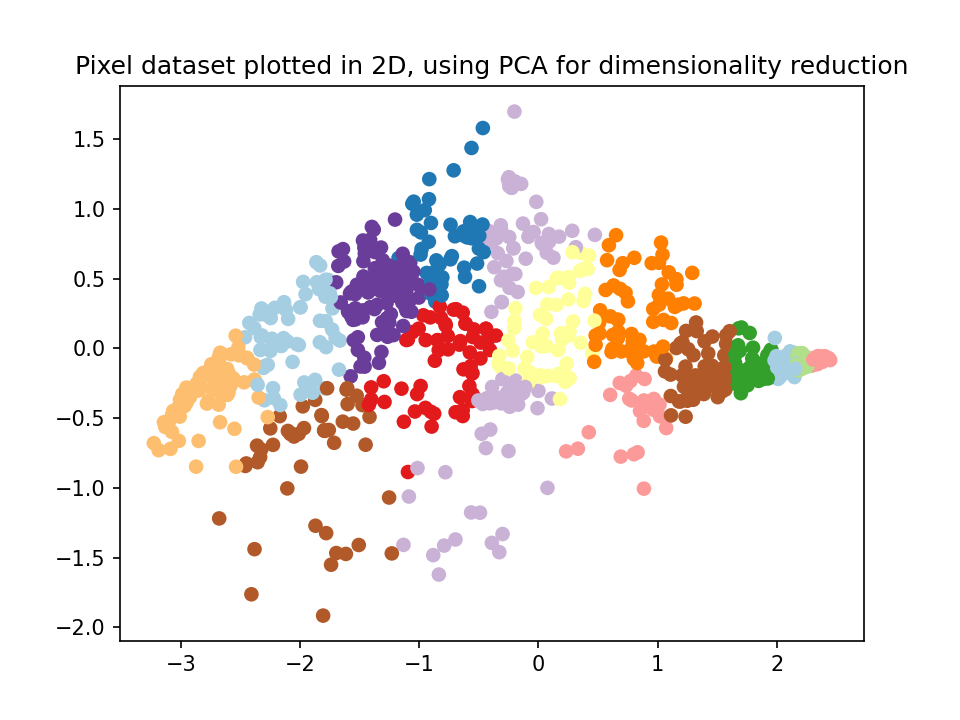

In [46]:
ax = plot_data_poits(Z[sel], idx[sel], K)
ax.set_title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction');

In [47]:
loss = pca_loss_quick(S, 2)
print(f'for K={2}, {((1.0 - loss) * 100):f} % of variance is retained');

for K=2, 99.341695 % of variance is retained
